In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# 1.What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

Inductive reasoning is making generalized conclusions based on specific observations; it's a bottom up approach. An example would be:
I normally leave work after 6 p.m. and I am usually able to avoid traffic. As long as I leave work after 6 p.m., I will always miss traffic.

Deductive reasoning is making a specific conclusion made from already available logical facts; it's a top-down approach. 
An example would be: All carnivores eat meat.
Lion is a carnivore.
Conclusion: – Lion eats meat


https://www.javatpoint.com/difference-between-inductive-and-deductive-reasoning
https://www.masterclass.com/articles/what-is-inductive-reasoning#6-types-of-inductive-reasoning

# 2. Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

one hot encoding won't work on this dataset since the data is already numerical. It will just skip over it.

In [2]:
#using Australian Credit Approval Data

#load the .dat file as an array
australia_array = sed = np.loadtxt('australian.dat')
australia_array
#Convert the array to a dataframe
credit_df = pd.DataFrame(australia_array)
credit_df
#new column names assigned
credit_df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]
#check new names
credit_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0


### Exploring the data

In [3]:
#generate list of features present in dataset
credit_df.columns #look at columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15'],
      dtype='object')

In [4]:
#datatype of the columns
#all the columns are floats (numerical), so no need to transform categorical data. 
#could use lable encode if there were non-numeric data in columns

credit_df.dtypes

A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
A6     float64
A7     float64
A8     float64
A9     float64
A10    float64
A11    float64
A12    float64
A13    float64
A14    float64
A15    float64
dtype: object

In [4]:
#get statistical data
credit_df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [6]:
# .info() will show me how many non-null values are present in each column
#the output shows that this data has no missing values. The document for this dataset states 
# the missing values were replaced by the mode of the attribute if categorical and mean if continuous

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    float64
 9   A10     690 non-null    float64
 10  A11     690 non-null    float64
 11  A12     690 non-null    float64
 12  A13     690 non-null    float64
 13  A14     690 non-null    float64
 14  A15     690 non-null    float64
dtypes: float64(15)
memory usage: 81.0 KB


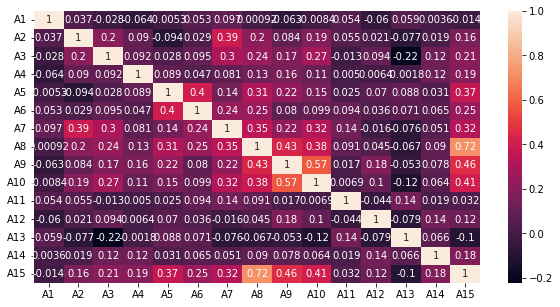

In [7]:
plt.figure(figsize= (10,5))
sns.heatmap(credit_df.corr(), annot = True)
plt.show()

In [5]:
#checking for imbalance in credit approval
# 0 = not approved, 1 = approved
credit_df['A15'].value_counts()

0.0    383
1.0    307
Name: A15, dtype: int64

**Standardize and train_test_split**

In [6]:
#A15 is the outcome = credit approval

#features
X = credit_df.drop('A15', axis=1)
#target variable
y = credit_df['A15']

In [7]:
# Split into training and test set: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [8]:
X_test.var()

1.0

# 3. Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

I first fit the decision tree with it's base parameters and received a performance score of 83%. ROCU_AUC was used as the evaluation metric since there is a small imbalance in the class of those who did and didn't receive credit approval. The confusion matrix for the untuned model shows that the proportion of the positive class the model got right is 80% (sensitivity/recall) and the false negative rate shows the modeel predicted 3% of the positive class incorrectly. 

To tune the model, gridsearchcv was used to find the best parameters for the model. The following parameters were placed in a params dictionary: criterion, max_depth, min_samples_split, min_samples_leaf. The best combination of these parameters yielded a grid score of 92% and the AUC score for the model increased to 85%. Both precision and recall improved with the tuned decision tree model.



https://ai.plainenglish.io/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

In [9]:
#getting baseline of decision tree's performance by fitting it w/ default parameters
dt = tree.DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

In [33]:
#will AUC as evaluation metric since the class is slightly imbalanced

y_pred_proba = dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#calculate AUC and pass in true labels and predicted probablities
auc = round(roc_auc_score(y_test, y_pred_proba)*100, 2)
print('AUC score of untuned model:', auc)

AUC score of untuned model: 83.15


In [13]:
confusion_matrix(y_test, y_pred_proba)

array([[80, 35],
       [ 3, 89]])

In [14]:
from sklearn.metrics import classification_report, plot_confusion_matrix

#gives accuracy of the model
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81       115
         1.0       0.72      0.97      0.82        92

    accuracy                           0.82       207
   macro avg       0.84      0.83      0.82       207
weighted avg       0.85      0.82      0.82       207



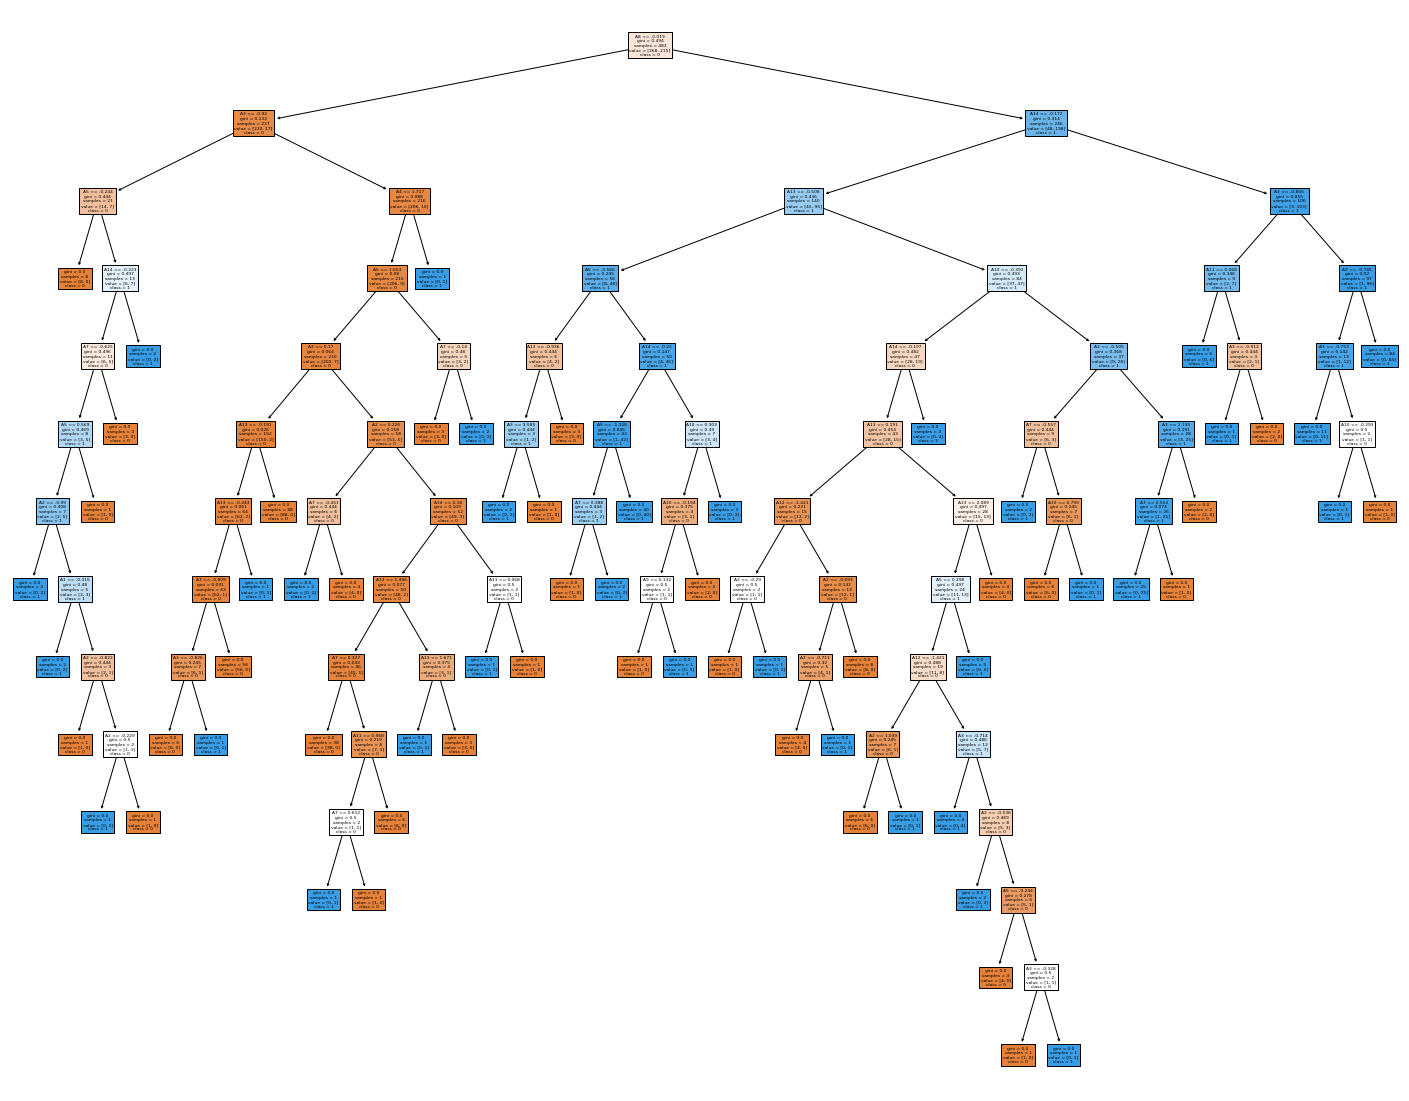

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['0', "1"],
                   filled=True)
plt.savefig('dt_tree.svg')

**Tuning DecisionTreeClassifier**

In [16]:
#print the hyperparameters for decisiontreeclassifier 
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 24, 'splitter': 'best'}


In [17]:
#GridSearchCV  to find the best hyperparameter combinations to produce the best model

#define grid of hyperparameters 'params_dict'

params_dict = {'criterion': ['gini', 'entropy'],
               'max_depth': range(1,10),
               'min_samples_split': range(1,10), 
              'min_samples_leaf': range(1, 5)}


In [20]:
#create GridSearchCV object. Inputs are decision tree object: dt, parameter values, and number of folds
#GridSearchCV to tune dt_model

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=dt, param_grid=params_dict, scoring='roc_auc', cv=3, verbose = 1, n_jobs = -1)

In [21]:
#fit grid to the training data
grid.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=24), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

In [22]:
#find the best hyperparameters from grid

best_hyperparams = grid.best_params_
print('Best hyperparameters to tune the model:\n', best_hyperparams)

Best hyperparameters to tune the model:
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [23]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=5, random_state=24)

In [24]:
grid.best_score_

0.9177657915868075

In [25]:
#plotting tuned dt with the best hyperparameters

#set tune_dt to the best combination of parameters
tuned_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=5, random_state=24)

#train the model using the training sets
tuned_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=5, random_state=24)

In [28]:
#predict the test set
tuned_dt_pred = tuned_dt.predict(X_test)

#print confusion matrix
print(confusion_matrix(y_test, tuned_dt_pred))

print(classification_report(y_test, tuned_dt_pred))

[[84 31]
 [ 2 90]]
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84       115
         1.0       0.74      0.98      0.85        92

    accuracy                           0.84       207
   macro avg       0.86      0.85      0.84       207
weighted avg       0.87      0.84      0.84       207



In [32]:
auc_dt = round(roc_auc_score(y_test, tuned_dt_pred)*100 ,2)
print('AUC score of tuned model:', auc_dt)

AUC score of tuned model: 85.43


# 4. Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

RandomForestClassifier is nn ensemble method, is a meta estimator that fits a nubmer of decision tree classifiers on various sub-samples of the dataset and uses averaging to imporve the predictive accuracy and control over-fitting.
I first executed the Random Forest Classifier with the baseline parameters to establish a baseline of the accuracy performance of the model. The model has a performance metric of 85%. To tune the model, I used RandomSearchCV to find the best parameters that would improve the model performance. A parameter dictionary was created with the following key parameters with various values: bootstrap, n_estimators, criterion, max_depth, min_samples_leaf, min_samples_split. 

RandomSearchCV chose the following parameters and values as the best parameters for the model:max_depth=76, min_samples_leaf=4, min_samples_split=8, n_estimators=200, random_state=24; it gave the best score of 89%. Tuning RandomForest with the parameters chosen gave a performance score of 86%, which is a 1% increase from the untuned model.

In [52]:
from sklearn.ensemble import RandomForestClassifier
#getting baseline of random forest's performance by fitting it w/ default parameters

#instatiate random forest classifier to rf_clf
rf_clf = RandomForestClassifier(random_state=24) 

#fit the training set to the ensemble
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=24)

In [53]:
y_pred = rf_clf.predict(X_test)

print('Accuracy score before model is tuned:', round(accuracy_score(y_test, y_pred)*100, 2))

Accuracy score before model is tuned: 85.02


In [54]:
#classification report
from sklearn.metrics import classification_report

rf_pred = rf_clf.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85       115
         1.0       0.78      0.92      0.85        92

    accuracy                           0.85       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.85      0.85       207



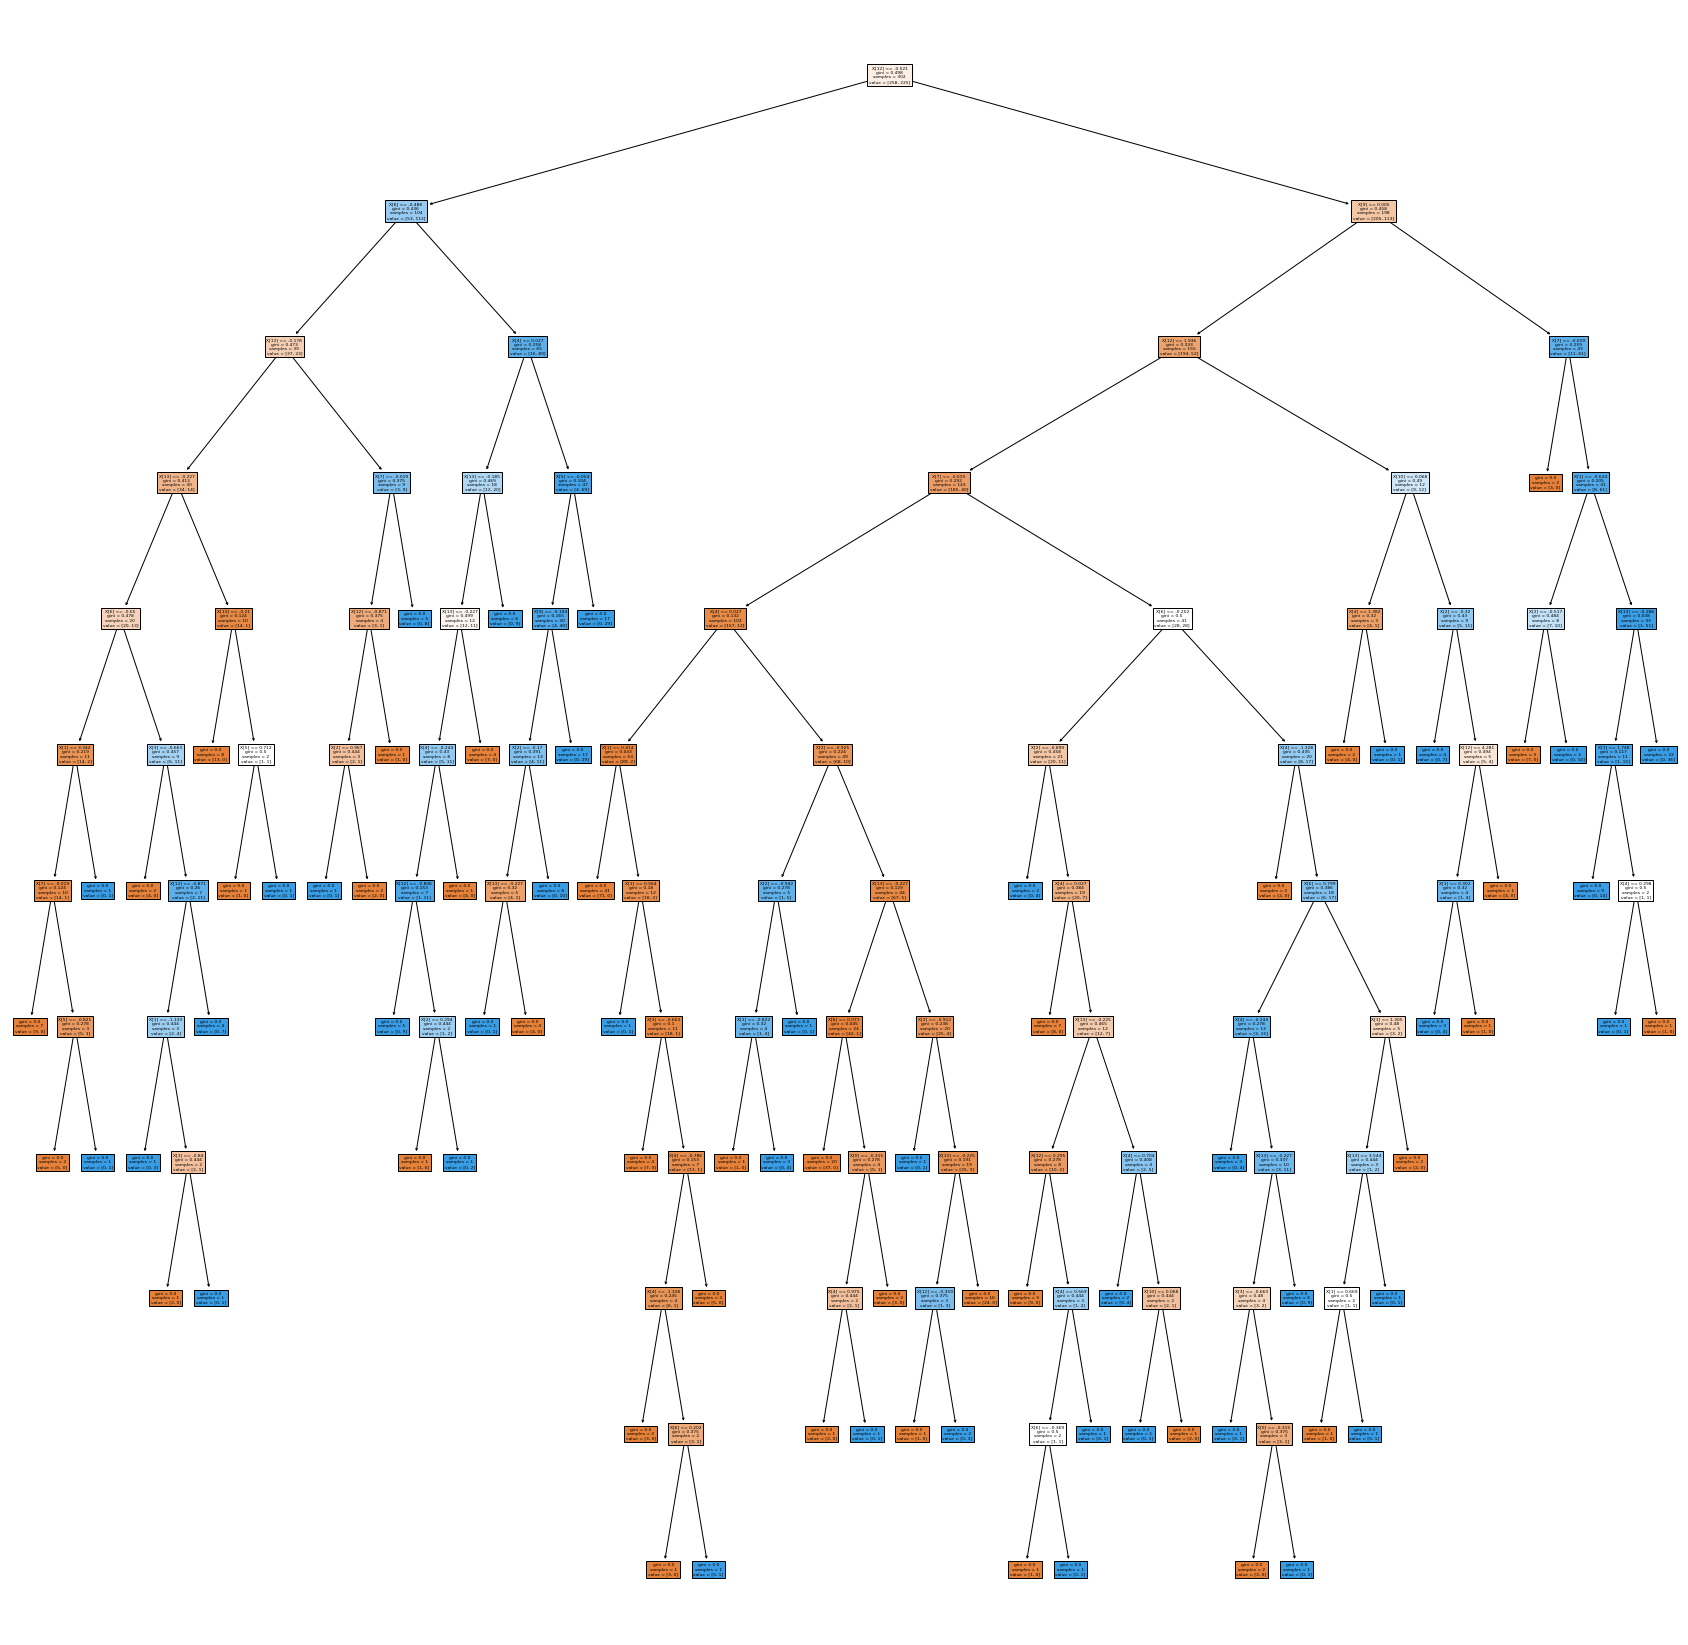

In [40]:
import matplotlib.pyplot as plt

# Plot the decision tree 
fig = plt.figure(figsize=(30,30))

# Plot the decision 
fig = tree.plot_tree(tree_10,filled=True)

# Save figure
plt.savefig("tree10.svg", dpi=200)

# Display 
plt.show()

#Shows a lot of decision trees and listening to all of them; giving them each their own vote

**Tuning RandomForest with random searchcv**

In [55]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [56]:
#define a grid of hyperparameters
params_rf = {'bootstrap': [True, False], 'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'],
             'max_depth': range(8, 100), 'min_samples_leaf': range(1,5), 'min_samples_split': range(1,10)}


#'max_features': ['auto', 'sqrt']

In [58]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = RandomizedSearchCV(estimator = rf_clf, param_distributions = params_rf, n_iter = 100, cv = 3, verbose = 2,
                             random_state = 24, n_jobs = -1)

In [59]:
#fit is to initiate traning process

rs_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=62, min_samples_leaf=4, min_samples_split=1, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=62, min_samples_leaf=4, min_samples_split=1, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=62, min_samples_leaf=4, min_samples_split=1, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=24),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(8, 100),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=24, verbose=2)

In [60]:
#find the best hyperparameters from rs_grid
best_hyperparams1 = rs_grid.best_params_
print("Best parameters:\n", best_hyperparams1)

Best parameters:
 {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 76, 'criterion': 'gini', 'bootstrap': True}


In [61]:
rs_grid.best_estimator_

RandomForestClassifier(max_depth=76, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200, random_state=24)

In [62]:
best_score = rs_grid.best_score_
print('Best score with hyperparameters to tune the model:\n', round(best_score *100, 2))

Best score with hyperparameters to tune the model:
 88.82


In [63]:
#plotting tuned dt with the best hyperparameters

#set tune_dt to the best combination of parameters
tuned_rf = RandomForestClassifier(max_depth=76, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200, random_state=24)


tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=76, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200, random_state=24)

In [64]:
#train the model using the training sets
tuned_rf_pred = tuned_rf.predict(X_test)

#print confusion matrix and classification report
print(confusion_matrix(y_test, tuned_rf_pred))

print(classification_report(y_test, tuned_rf_pred))


[[92 23]
 [ 7 85]]
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       115
         1.0       0.79      0.92      0.85        92

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.87      0.86      0.86       207



In [65]:
#evaluate the test-set score

acc_rf = round(roc_auc_score(y_test, tuned_rf_pred)*100 ,2)
print('The performance score of tuned model:', acc_rf)

The performance score of tuned model: 86.2


# 5. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

I established a basline of the XGB performance with its default parameters. The objective was set to “binary:logistic“: XGBoost loss function for binary classification, since the outcome of the model is binary. With the default parameters, the performance of XGB model is 87%. GridsearchCV was used again to find the best parameters to tune the model. A dictionary of these parameters were used for gridsearch to use: max_depth, n_estimators, learning_rate, gamma, subsample, reg_lambda, scale_pos_weight. After the model was tuned, it produced a score of 86%. 

In [66]:
from xgboost import XGBClassifier
#get the performance of xgb with default variables before tuning

#objective is 
xgb = XGBClassifier(objective='binary:logistic', nthread=4, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(nthread=4, random_state=42)

In [69]:
xgb_pred = xgb.predict(X_test)
print('Accuracy score before model is tuned:', round(accuracy_score(y_test, xgb_pred)*100, 2))

Accuracy score before model is tuned: 86.96


In [68]:
#another way to evaluate a default XGBoost model on imbalanced classification.
#the score is the baseline for comparison for any hyperparameter tuning performed for the default XGBoost algorithm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#define eval method: cross validation
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model

scores = cross_val_score(xgb, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)

In [70]:
print("Mean ROC AUC: %.5f" % np.mean(scores))

Mean ROC AUC: 0.93133


In [71]:
#show performance of XGBoost with classification table
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       115
         1.0       0.79      0.96      0.87        92

    accuracy                           0.87       207
   macro avg       0.88      0.88      0.87       207
weighted avg       0.88      0.87      0.87       207



The performance of this model, before being tuned has a higher accuracy score, precision, and recall in comparison to the RandomForest model.

**Tune the model using Cross Validation and GridSearch**

In [72]:
xgb_parameters = {'max_depth': [4,5,6],
                  'n_estimators': range(200, 400, 600),
           'learning_rate': [0.1, 0.01, 0.05],
           'gamma': [0, 1, 5],
            'subsample': [0.5, 0.6, 0.8],
           'reg_lambda': [0, 1.0, 10.0],
           'scale_pos_weight': [1,3,5]}

In [73]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = xgb, param_grid = xgb_parameters, scoring = 'roc_auc', n_jobs = 10,
                          cv = 5, verbose = 2)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.5; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.5; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.5; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.6; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200, reg_lambda=0, scale_pos_weight=1, subsample=0.6; tot

GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, random_state=42),
             n_jobs=10,
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [4, 5, 6],
                         'n_estimators': range(200, 400, 600),
                         'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.5, 0.6, 0.8]},
             scoring='roc_auc', verbose=2)

In [76]:
#best estimator shows the best model trained by gridsearch

grid_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, nthread=4,
              random_state=42, reg_lambda=10.0, subsample=0.5)

In [77]:
#find the best hyperparameters from grid_search

best_params = grid_search.best_params_
print("Best parameters:\n", best_params)

Best parameters:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 10.0, 'scale_pos_weight': 1, 'subsample': 0.5}


In [78]:
best_score1 = grid_search.best_score_

print('The score of the model with the best hyperparameters to tune the model:\n', round(best_score1*100, 2))

The score of the model with the best hyperparameters to tune the model:
 94.17


In [79]:
tuned_xgb = XGBClassifier(gamma=1.0, max_depth=4, learning_rate=0.05, n_estimators=200, nthread=4, subsample=0.8,
              random_state=42, reg_lambda=10.0)
tuned_xgb.fit(X_train, y_train)

XGBClassifier(gamma=1.0, learning_rate=0.05, max_depth=4, n_estimators=200,
              nthread=4, random_state=42, reg_lambda=10.0, subsample=0.8)

In [80]:
tuned_xgb_pred = tuned_xgb.predict(X_test)
print(classification_report(y_test, tuned_xgb_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86       115
         1.0       0.79      0.93      0.86        92

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207



In [81]:
acc_xgb = round(accuracy_score(y_test, tuned_xgb_pred) * 100, 2)
print('Performance metric of tuned decision tree model:', acc_xgb)

Performance metric of tuned decision tree model: 85.99


# 6.	Which model performed best? What is your performance metric? Why?

The random forest model had the best performance score for this dataset, although the difference between randon forest and xbgboost is not very different. Small changes to the hyperparameters has a bigger impact on the model, which may be why the performance metric may be better.

In [82]:
models = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
                      'Score': [auc_dt, acc_rf, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,86.20
2,XGBoost,85.99
0,Decision Tree,85.43


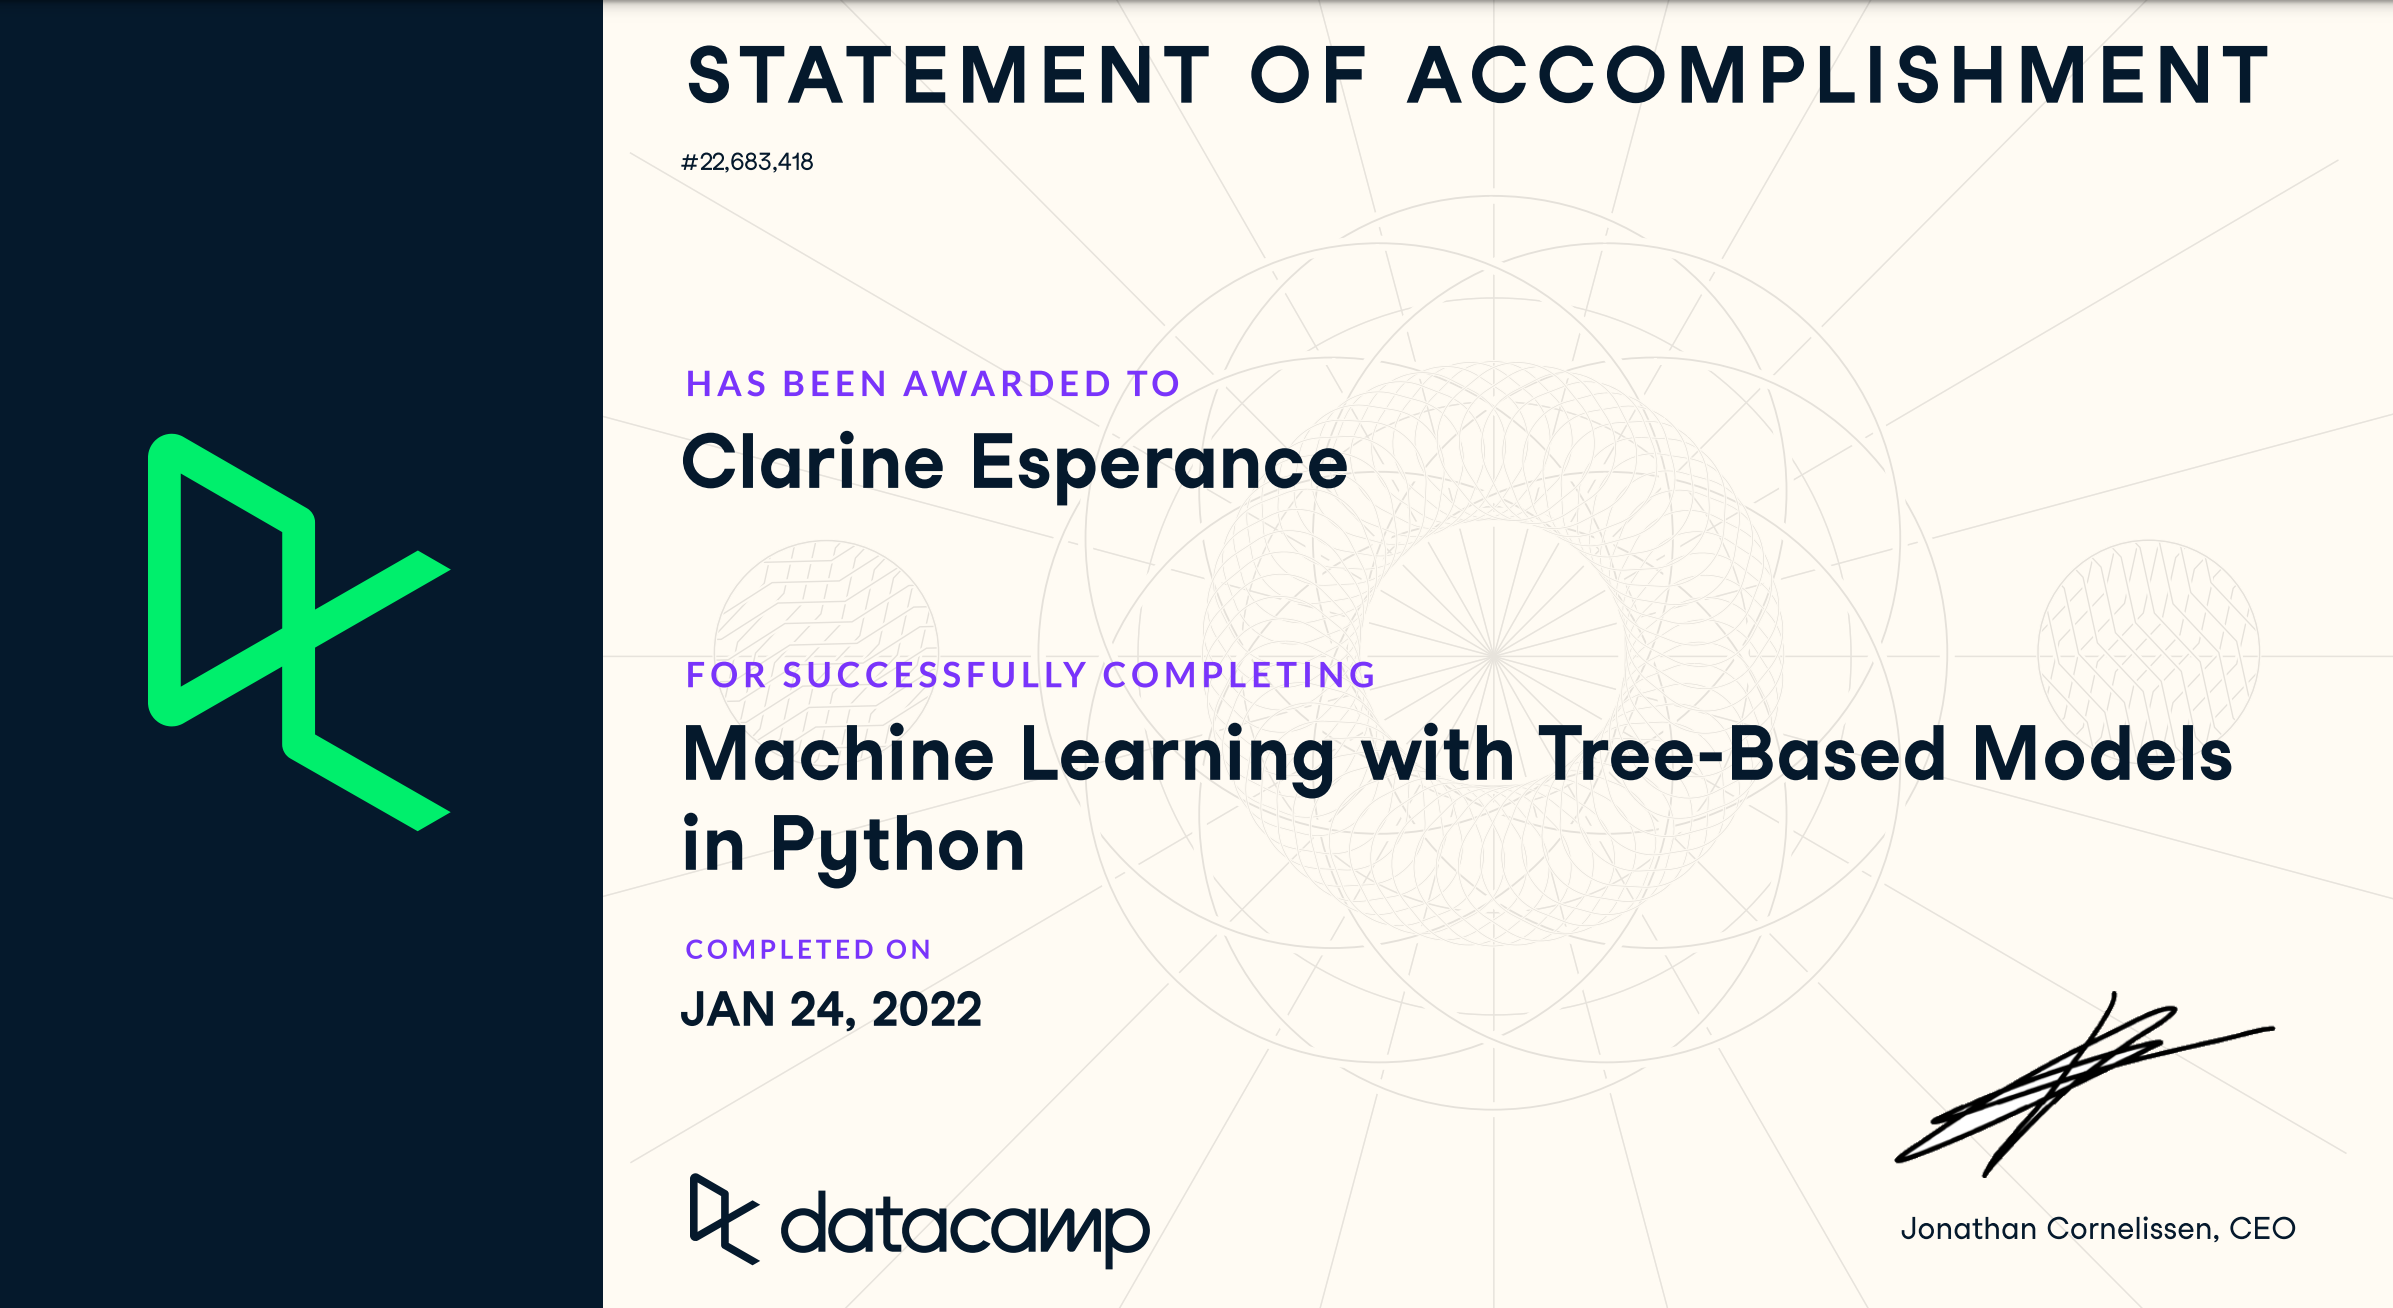